In [38]:
import os
import ast
import json
import numpy as np
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

In [2]:
df = pd.read_csv('../data/search/JDOviedoAr_sentiment.csv')
df

,entities,author_id,id,text,created_at,public_metrics,edit_history_tweet_ids,username,name,sentiment_llm
0,"{'annotations': [{'start': 265, 'end': 272, 'p...",177823502,1973030623792296212,El RIDICULO que hicieron estos señores de la u...,2025-09-30 14:22:12+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973030623792296212'],mikeariza,Miguel Ariza Castro,NEGATIVO
1,"{'mentions': [{'start': 0, 'end': 15, 'usernam...",3145461383,1973029119152787676,@lavozdelojusto @JDOviedoAr @ConTodaPorCol @Me...,2025-09-30 14:16:13+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973029119152787676'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO
2,"{'annotations': [{'start': 76, 'end': 79, 'pro...",3145461383,1973028989192314940,@Palabrejo @JDOviedoAr @ConTodaPorCol @MejorJu...,2025-09-30 14:15:42+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973028989192314940'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO
3,"{'annotations': [{'start': 63, 'end': 71, 'pro...",3145461383,1973028873748238623,@527ElduroJadin @JDOviedoAr @ConTodaPorCol @Me...,2025-09-30 14:15:15+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973028873748238623'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO
4,"{'annotations': [{'start': 60, 'end': 64, 'pro...",3145461383,1973028724628238409,@sircamilopinto @JDOviedoAr @ConTodaPorCol @Me...,2025-09-30 14:14:39+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973028724628238409'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO
...,...,...,...,...,...,...,...,...,...,...
2646,"{'mentions': [{'start': 0, 'end': 7, 'username...",1597223287,1970534072402550958,@Hora20 @JDOviedoAr @susanamuhamad @PaolaHolgu...,2025-09-23 17:01:48+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970534072402550958'],umabdalaziz3,BENJAMÍN,NEUTRO
2647,"{'mentions': [{'start': 0, 'end': 7, 'username...",1488698923,1970533639801786425,@Hora20 @JDOviedoAr @susanamuhamad @PaolaHolgu...,2025-09-23 17:00:05+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970533639801786425'],maha_875,lina maría,NEUTRO
2648,"{'mentions': [{'start': 0, 'end': 7, 'username...",1378620511,1970533637004443968,@Hora20 @JDOviedoAr @susanamuhamad @PaolaHolgu...,2025-09-23 17:00:04+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970533637004443968'],Pepiinno,ricardo,NEUTRO
2649,"{'mentions': [{'start': 111, 'end': 126, 'user...",1638556330976747520,1970522817612652670,Carta Solicitud Reconciderar Cupos Escolares E...,2025-09-23 16:17:04+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970522817612652670'],JeissonRayoR,Jeisson S. Rayo Rodríguez,NEUTRO


In [25]:
df['username'].value_counts()

username
BunkerGlo          22
Boyacaindt         12
Jeny51302055       11
leomendozagp0      11
DIANAPA39018151     9
                   ..
William22169        1
regodeandose        1
ingebarco           1
enriqueha           1
TDCCompiler         1
Name: count, Length: 2072, dtype: int64

In [28]:
df['username'].value_counts().describe(np.arange(0, 1, 0.05))

count    2072.000000
mean        1.279440
std         0.954596
min         1.000000
0%          1.000000
5%          1.000000
10%         1.000000
15%         1.000000
20%         1.000000
25%         1.000000
30%         1.000000
35%         1.000000
40%         1.000000
45%         1.000000
50%         1.000000
55%         1.000000
60%         1.000000
65%         1.000000
70%         1.000000
75%         1.000000
80%         1.000000
85%         2.000000
90%         2.000000
95%         2.000000
max        22.000000
Name: count, dtype: float64

In [11]:
# {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0, 'bookmark_count': 0, 'impression_count': 0}

In [43]:
def get_public_metrics(metrics_json):
    data = ast.literal_eval(metrics_json)
    return pd.Series([
        data['retweet_count'],
        data['reply_count'],
        data['like_count'],
        data['quote_count'],
        data['bookmark_count'],
        data['impression_count']
    ])

In [44]:
df[['retweet_count', 'reply_count', 'like_count', 'quote_count', 'bookmark_count', 'impression_count']] = df['public_metrics'].progress_apply(lambda x: get_public_metrics(x))
df

100%|█████████████████████████████████████| 2651/2651 [00:00<00:00, 4288.26it/s]


,entities,author_id,id,text,created_at,public_metrics,edit_history_tweet_ids,username,name,sentiment_llm,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count
0,"{'annotations': [{'start': 265, 'end': 272, 'p...",177823502,1973030623792296212,El RIDICULO que hicieron estos señores de la u...,2025-09-30 14:22:12+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973030623792296212'],mikeariza,Miguel Ariza Castro,NEGATIVO,0,0,0,0,0,2
1,"{'mentions': [{'start': 0, 'end': 15, 'usernam...",3145461383,1973029119152787676,@lavozdelojusto @JDOviedoAr @ConTodaPorCol @Me...,2025-09-30 14:16:13+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973029119152787676'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO,0,0,0,0,0,2
2,"{'annotations': [{'start': 76, 'end': 79, 'pro...",3145461383,1973028989192314940,@Palabrejo @JDOviedoAr @ConTodaPorCol @MejorJu...,2025-09-30 14:15:42+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973028989192314940'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO,0,0,0,0,0,2
3,"{'annotations': [{'start': 63, 'end': 71, 'pro...",3145461383,1973028873748238623,@527ElduroJadin @JDOviedoAr @ConTodaPorCol @Me...,2025-09-30 14:15:15+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973028873748238623'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO,0,0,0,0,0,2
4,"{'annotations': [{'start': 60, 'end': 64, 'pro...",3145461383,1973028724628238409,@sircamilopinto @JDOviedoAr @ConTodaPorCol @Me...,2025-09-30 14:14:39+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973028724628238409'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,"{'mentions': [{'start': 0, 'end': 7, 'username...",1597223287,1970534072402550958,@Hora20 @JDOviedoAr @susanamuhamad @PaolaHolgu...,2025-09-23 17:01:48+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970534072402550958'],umabdalaziz3,BENJAMÍN,NEUTRO,0,0,0,0,0,3
2647,"{'mentions': [{'start': 0, 'end': 7, 'username...",1488698923,1970533639801786425,@Hora20 @JDOviedoAr @susanamuhamad @PaolaHolgu...,2025-09-23 17:00:05+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970533639801786425'],maha_875,lina maría,NEUTRO,0,0,0,0,0,5
2648,"{'mentions': [{'start': 0, 'end': 7, 'username...",1378620511,1970533637004443968,@Hora20 @JDOviedoAr @susanamuhamad @PaolaHolgu...,2025-09-23 17:00:04+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970533637004443968'],Pepiinno,ricardo,NEUTRO,0,0,0,0,0,5
2649,"{'mentions': [{'start': 111, 'end': 126, 'user...",1638556330976747520,1970522817612652670,Carta Solicitud Reconciderar Cupos Escolares E...,2025-09-23 16:17:04+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970522817612652670'],JeissonRayoR,Jeisson S. Rayo Rodríguez,NEUTRO,0,0,0,0,0,48


In [45]:
df[['retweet_count', 'reply_count', 'like_count', 'quote_count', 'bookmark_count', 'impression_count']].describe()

,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000
mean,0.613731,0.393436,3.128253,0.048284,0.021501,172.207469
std,9.429709,9.770781,39.833012,1.274395,0.501986,3528.991232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,34.000000
max,370.000000,467.000000,1407.000000,49.000000,21.000000,166260.000000


In [46]:
df["engagement"] = (
    df["retweet_count"] * 2   # A count of how many times the Post has been Retweeted. Does not include Quote Tweets (“Retweets with comment”).
    + df["reply_count"] * 1.5 # A count of how many times the Post has been replied to.
    + df["like_count"] * 1    # A count of how many times the Post has been liked.
    + df["quote_count"] * 2.5 # A count of how many times the Post has been Retweeted with a new comment (message).
)
df

,entities,author_id,id,text,created_at,public_metrics,edit_history_tweet_ids,username,name,sentiment_llm,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count,engagement
0,"{'annotations': [{'start': 265, 'end': 272, 'p...",177823502,1973030623792296212,El RIDICULO que hicieron estos señores de la u...,2025-09-30 14:22:12+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973030623792296212'],mikeariza,Miguel Ariza Castro,NEGATIVO,0,0,0,0,0,2,0.0
1,"{'mentions': [{'start': 0, 'end': 15, 'usernam...",3145461383,1973029119152787676,@lavozdelojusto @JDOviedoAr @ConTodaPorCol @Me...,2025-09-30 14:16:13+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973029119152787676'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO,0,0,0,0,0,2,0.0
2,"{'annotations': [{'start': 76, 'end': 79, 'pro...",3145461383,1973028989192314940,@Palabrejo @JDOviedoAr @ConTodaPorCol @MejorJu...,2025-09-30 14:15:42+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973028989192314940'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO,0,0,0,0,0,2,0.0
3,"{'annotations': [{'start': 63, 'end': 71, 'pro...",3145461383,1973028873748238623,@527ElduroJadin @JDOviedoAr @ConTodaPorCol @Me...,2025-09-30 14:15:15+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973028873748238623'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO,0,0,0,0,0,2,0.0
4,"{'annotations': [{'start': 60, 'end': 64, 'pro...",3145461383,1973028724628238409,@sircamilopinto @JDOviedoAr @ConTodaPorCol @Me...,2025-09-30 14:14:39+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1973028724628238409'],08Rosareda,Andrea 🦕 🌌💋🐳🐙,NEUTRO,0,0,0,0,0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,"{'mentions': [{'start': 0, 'end': 7, 'username...",1597223287,1970534072402550958,@Hora20 @JDOviedoAr @susanamuhamad @PaolaHolgu...,2025-09-23 17:01:48+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970534072402550958'],umabdalaziz3,BENJAMÍN,NEUTRO,0,0,0,0,0,3,0.0
2647,"{'mentions': [{'start': 0, 'end': 7, 'username...",1488698923,1970533639801786425,@Hora20 @JDOviedoAr @susanamuhamad @PaolaHolgu...,2025-09-23 17:00:05+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970533639801786425'],maha_875,lina maría,NEUTRO,0,0,0,0,0,5,0.0
2648,"{'mentions': [{'start': 0, 'end': 7, 'username...",1378620511,1970533637004443968,@Hora20 @JDOviedoAr @susanamuhamad @PaolaHolgu...,2025-09-23 17:00:04+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970533637004443968'],Pepiinno,ricardo,NEUTRO,0,0,0,0,0,5,0.0
2649,"{'mentions': [{'start': 111, 'end': 126, 'user...",1638556330976747520,1970522817612652670,Carta Solicitud Reconciderar Cupos Escolares E...,2025-09-23 16:17:04+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1970522817612652670'],JeissonRayoR,Jeisson S. Rayo Rodríguez,NEUTRO,0,0,0,0,0,48,0.0


In [53]:
user_stats = df.groupby("username").agg(
    tweets=("username", "count"),
    total_engagement=("engagement", "sum"),
    total_impressions=("impression_count", "sum"),
    avg_engagement=("engagement", "mean"),
    avg_impressions=("impression_count", "mean"),
    sentiment=("sentiment_llm", pd.Series.mode)
).reset_index()
user_stats

,username,tweets,total_engagement,total_impressions,avg_engagement,avg_impressions,sentiment
0,03PedroMendoza,1,0.0,6,0.0,6.000000,NEUTRO
1,0608_samuel,1,0.0,14,0.0,14.000000,NEGATIVO
2,08Edgarcadena,1,0.0,9,0.0,9.000000,NEGATIVO
3,08Rosareda,6,0.0,14,0.0,2.333333,NEUTRO
4,09Forero,1,1.0,15,1.0,15.000000,NEUTRO
...,...,...,...,...,...,...,...
2067,yuricarrascalGO,1,0.0,13,0.0,13.000000,NEUTRO
2068,zetazzzzzz,2,0.0,47,0.0,23.500000,NEGATIVO
2069,zombiecuervo,1,0.0,30,0.0,30.000000,NEGATIVO
2070,zr1608,1,0.0,21,0.0,21.000000,NEUTRO


In [54]:
user_stats["influence_score"] = (
    user_stats["total_engagement"]*0.6 +
    user_stats["total_impressions"]*0.4
)
user_stats

,username,tweets,total_engagement,total_impressions,avg_engagement,avg_impressions,sentiment,influence_score
0,03PedroMendoza,1,0.0,6,0.0,6.000000,NEUTRO,2.4
1,0608_samuel,1,0.0,14,0.0,14.000000,NEGATIVO,5.6
2,08Edgarcadena,1,0.0,9,0.0,9.000000,NEGATIVO,3.6
3,08Rosareda,6,0.0,14,0.0,2.333333,NEUTRO,5.6
4,09Forero,1,1.0,15,1.0,15.000000,NEUTRO,6.6
...,...,...,...,...,...,...,...,...
2067,yuricarrascalGO,1,0.0,13,0.0,13.000000,NEUTRO,5.2
2068,zetazzzzzz,2,0.0,47,0.0,23.500000,NEGATIVO,18.8
2069,zombiecuervo,1,0.0,30,0.0,30.000000,NEGATIVO,12.0
2070,zr1608,1,0.0,21,0.0,21.000000,NEUTRO,8.4


In [55]:
user_stats.sort_values("influence_score", ascending=False).head(50)

,username,tweets,total_engagement,total_impressions,avg_engagement,avg_impressions,sentiment,influence_score
1729,lunadavid,1,2227.0,166260,2227.000000,166260.000000,POSITIVO,67840.2
1135,UltimaHoraCR,1,2493.0,60261,2493.000000,60261.000000,NEUTRO,25600.2
1148,VickyDavilaH,1,554.5,32094,554.500000,32094.000000,POSITIVO,13170.3
949,PalomaValenciaL,1,1431.5,24267,1431.500000,24267.000000,NEUTRO,10565.7
531,Hora20,9,73.5,13124,8.166667,1458.222222,NEUTRO,5293.7
694,KLASEMEDIA,1,40.5,7665,40.500000,7665.000000,NEUTRO,3090.3
191,Borbon62610859,1,50.0,3183,50.000000,3183.000000,NEGATIVO,1303.2
1439,elespectador,1,7.5,2692,7.500000,2692.000000,NEUTRO,1081.3
220,CaracolRadio,1,6.0,2587,6.000000,2587.000000,NEUTRO,1038.4
221,Carbonell1784,4,317.0,1960,79.250000,490.000000,NEUTRO,974.2



📊 Top 20 usuarios por influencia vs actividad:
             username  tweets  total_engagement  total_impressions  \
1135     UltimaHoraCR       1            2493.0              60261   
1729        lunadavid       1            2227.0             166260   
949   PalomaValenciaL       1            1431.5              24267   
1148     VickyDavilaH       1             554.5              32094   
221     Carbonell1784       4             317.0               1960   
1947         rpcj6890       1             221.0               1289   
1399         dicabesu       2             176.5               1448   
551    Ironic_Blossom       1             163.0               1002   
173        BcaVirtual       3             159.0               1100   
1575          jairohg       6             143.5                640   
1397         dic66569       3             119.5                564   
150         ArnolHM77       1             110.0               1029   
64     AfricaCimarron       3             

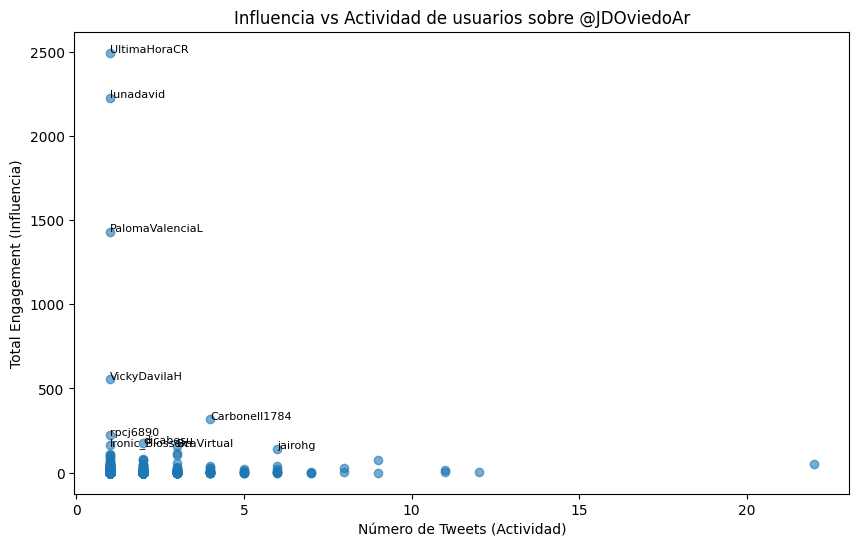

In [56]:
import matplotlib.pyplot as plt

ranking = user_stats.sort_values(
    ["total_engagement", "tweets"], ascending=[False, False]
).head(20)

print("\n📊 Top 20 usuarios por influencia vs actividad:")
print(ranking)

# --- Gráfico de dispersión ---
plt.figure(figsize=(10,6))
plt.scatter(user_stats["tweets"], user_stats["total_engagement"], alpha=0.6)

plt.xlabel("Número de Tweets (Actividad)")
plt.ylabel("Total Engagement (Influencia)")
plt.title("Influencia vs Actividad de usuarios sobre @JDOviedoAr")

# Destacar los top 10
top_users = ranking.head(10)
for _, row in top_users.iterrows():
    plt.text(row["tweets"], row["total_engagement"], row["username"], fontsize=8)

plt.show()